In [1]:
print("Loading Libraries...")
import os, sys
import platform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as scin
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from sklearn import neighbors, datasets
print("Loaded Libraries...")

Loading Libraries...
Loaded Libraries...


In [2]:
print("Loading directories..")
path_acu = 'C:/Users/JMosiezny/Documents/01_PUT/01_DOKTORAT/13_PLGRID/noise-data/int-tip-post/acu'
path_fft = 'C:/Users/JMosiezny/Documents/01_PUT/01_DOKTORAT/15_results/fft'
print("Loaded directories...")

Loading directories..
Loaded directories...


In [3]:
os.chdir(path_fft)
data = pd.read_csv('part.csv').set_index('nodenumber')
data = data.applymap(complex)
data

,int-01_acu_33321.dat,int-01_acu_33331.dat,int-01_acu_33341.dat,int-01_acu_33351.dat,int-01_acu_33361.dat,int-01_acu_33371.dat,int-01_acu_33381.dat,int-01_acu_33391.dat,int-01_acu_33401.dat,int-01_acu_33411.dat,...,int-01_acu_33721.dat,int-01_acu_33731.dat,int-01_acu_33741.dat,int-01_acu_33751.dat,int-01_acu_33761.dat,int-01_acu_33771.dat,int-01_acu_33781.dat,int-01_acu_33791.dat,int-01_acu_33801.dat,int-01_acu_33811.dat
nodenumber,,,,,,,,,,,,,,,,,,,,,
1,(30.990650009800113+0j),(5511.698478444532-7739.206327774022j),(-7071.369309671292+7240.676078238103j),(4492.460985293059+359.1806513896224j),(276.5331172713328+7744.1637779144885j),(-8006.327209673089-4074.748753606197j),(-9104.923079499873+7792.353997223672j),(-2195.2257548987113-1355.38430317698j),(3955.503610780954+2053.775177288103j),(-3099.4439993404585+13614.187805893602j),...,(3557.1048849532576+486.2553767919597j),(-3878.035512264746-620.4945801522708j),(6660.75802924209-1144.6054108758356j),(1776.660054026615+1031.255191950705j),(3689.698778574804+2714.9924128158063j),(1205.073419273559+1129.1896976912683j),(-1584.222034719716+1629.4199216246732j),(-2403.668483121396-4192.211848569967j),(6272.012137066467-1267.6258097043453j),(-6358.0824625075375+2857.0234721610323j)
2,(30.59028302940707+0j),(5522.188869264011-7744.578683676766j),(-7045.401912007805+7245.519054948268j),(4536.392861518089+362.288020466723j),(287.2032454340283+7759.9873624583015j),(-7987.914955414251-4018.80186272787j),(-9074.718389922247+7830.062618822683j),(-2185.2968747838086-1348.9862096685442j),(4002.8033489753498+2058.4423114967585j),(-3021.874782993977+13602.894626041107j),...,(3607.8046701808+396.38209796656486j),(-3842.5275477951172-501.8271100786289j),(6677.878825786909-1322.2119203257253j),(1836.918973124228+994.5851656186081j),(3784.070116118359+2639.8497385216333j),(1251.1902197580814+1109.3701715725347j),(-1514.9814878459977+1686.236016766487j),(-2502.6353317677404-4131.020349819099j),(6237.918831055078-1444.2070893652835j),(-6244.894021081385+3028.7725304150786j)
3,(30.063443947947434+0j),(5517.937379118937-7737.262988427668j),(-7039.464850189582+7249.442956657199j),(4536.393143814658+366.4648007728436j),(286.9047750740003+7761.078202439143j),(-7986.162631416169-4014.0688808284685j),(-9074.364881879945+7832.938854979981j),(-2183.5182542277207-1347.2165344946543j),(4005.151287201022+2059.9183379241103j),(-3021.020392404872+13599.915734562323j),...,(3612.2220769009923+393.2250544171375j),(-3837.697400997152-497.02403916876074j),(6678.811376900117-1327.543032949254j),(1837.3686529952697+988.4954282495323j),(3786.287906445723+2635.7866748193555j),(1254.721765270736+1111.292640067746j),(-1512.779215596828+1684.4907258980547j),(-2506.457407646116-4124.25519934741j),(6231.509289342417-1445.8614200724264j),(-6241.114385861643+3032.9339779772786j)
4,(29.594108955191736+0j),(5513.3638374575985-7727.976123603983j),(-7032.380099442865+7250.299791259826j),(4534.694409964277+368.30027120598965j),(281.11622466535744+7763.654547632381j),(-7986.241907851257-4003.2547387191544j),(-9074.624056434015+7832.60848721748j),(-2182.1807295789304-1345.2614997922074j),(4008.5882718255607+2059.993661987165j),(-3021.253907269969+13591.892954005625j),...,(3615.3371033623234+392.1825825661805j),(-3832.701928540525-490.80909910470973j),(6681.615542076338-1337.8771130814177j),(1839.1255617365564+983.481146068917j),(3788.634204944696+2637.413548872397j),(1254.4236357498341+1114.3306814491793j),(-1507.7912220214673+1684.1304422649414j),(-2509.7697714497363-4115.803815164395j),(6223.259698692544-1450.1086290856488j),(-6237.947093506906+3034.791237226559j)
5,(29.114671002535047+0j),(5508.131730776232-7719.555393063948j),(-7026.02051092992+7251.01978483242j),(4534.414967844932+368.2622096914088j),(279.92976388622213+7763.92329240531j),(-7984.671508007054-3994.8339515132884j),(-9073.138816072722+7831.6534314881665j),(-2183.0369783368546-1344.0410136769801j),(4010.7712487087047+2060.00300113079j),(-3017.533652239853+13585.38139

In [34]:
mag = data.applymap(lambda x: 2*np.sqrt(x.real**2 + x.imag**2)/50)
mag.max()

int-01_acu_33321.dat      1.261507
int-01_acu_33331.dat    382.841644
int-01_acu_33341.dat    407.152588
int-01_acu_33351.dat    182.772949
int-01_acu_33361.dat    311.334181
int-01_acu_33371.dat    362.677790
int-01_acu_33381.dat    482.245997
int-01_acu_33391.dat    105.370268
int-01_acu_33401.dat    180.966863
int-01_acu_33411.dat    560.271971
int-01_acu_33421.dat    193.300797
int-01_acu_33431.dat    723.894126
int-01_acu_33441.dat    299.620299
int-01_acu_33451.dat    104.494614
int-01_acu_33461.dat    105.650764
int-01_acu_33471.dat    253.063311
int-01_acu_33481.dat    292.316452
int-01_acu_33491.dat     77.801572
int-01_acu_33501.dat    165.858496
int-01_acu_33511.dat    196.018303
int-01_acu_33521.dat    525.726667
int-01_acu_33531.dat    135.044555
int-01_acu_33541.dat     54.371692
int-01_acu_33551.dat    197.308435
int-01_acu_33561.dat    140.260272
int-01_acu_33571.dat     51.687995
int-01_acu_33581.dat    210.129247
int-01_acu_33591.dat     90.265458
int-01_acu_33601.dat

In [35]:
mag.columns = np.arange(0,50)

In [36]:
mag.max().max()

723.894125613753

In [37]:
mag2 = pd.DataFrame(np.random.randint(750, size=(50, 50)))
mag2

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,532,668,203,565,169,395,622,25,57,404,...,544,179,696,482,538,476,589,245,255,107
1,569,709,60,289,617,243,436,137,389,37,...,315,17,404,448,309,151,423,664,60,272
2,700,511,377,212,735,210,211,643,527,634,...,456,383,87,718,425,196,100,332,118,480
3,487,489,57,652,77,604,267,423,273,36,...,137,320,548,93,54,150,501,52,61,662
4,269,659,628,490,685,46,701,745,178,505,...,651,330,366,546,518,349,304,97,540,485
5,603,294,285,357,199,62,370,621,455,14,...,87,640,230,206,394,540,467,735,443,533
6,680,76,369,448,180,52,131,588,732,28,...,553,376,417,657,452,745,228,59,318,220
7,336,77,514,157,474,608,626,703,666,273,...,2,162,367,712,515,126,39,517,619,492
8,278,740,600,142,473,208,254,516,71,283,...,195,315,374,331,176,16,278,308,711,161
9,722,95,148,123,311,683,601,373,597,520,...,180,327,472,495,76,586,286,164,339,694


In [44]:
mag2.index.rename('nodenumber', inplace=True)
mag2

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
nodenumber,,,,,,,,,,,,,,,,,,,,,
0,532,668,203,565,169,395,622,25,57,404,...,544,179,696,482,538,476,589,245,255,107
1,569,709,60,289,617,243,436,137,389,37,...,315,17,404,448,309,151,423,664,60,272
2,700,511,377,212,735,210,211,643,527,634,...,456,383,87,718,425,196,100,332,118,480
3,487,489,57,652,77,604,267,423,273,36,...,137,320,548,93,54,150,501,52,61,662
4,269,659,628,490,685,46,701,745,178,505,...,651,330,366,546,518,349,304,97,540,485
5,603,294,285,357,199,62,370,621,455,14,...,87,640,230,206,394,540,467,735,443,533
6,680,76,369,448,180,52,131,588,732,28,...,553,376,417,657,452,745,228,59,318,220
7,336,77,514,157,474,608,626,703,666,273,...,2,162,367,712,515,126,39,517,619,492
8,278,740,600,142,473,208,254,516,71,283,...,195,315,374,331,176,16,278,308,711,161


In [57]:
mag2.rename_axis("frequency bin", axis=1, inplace=True)

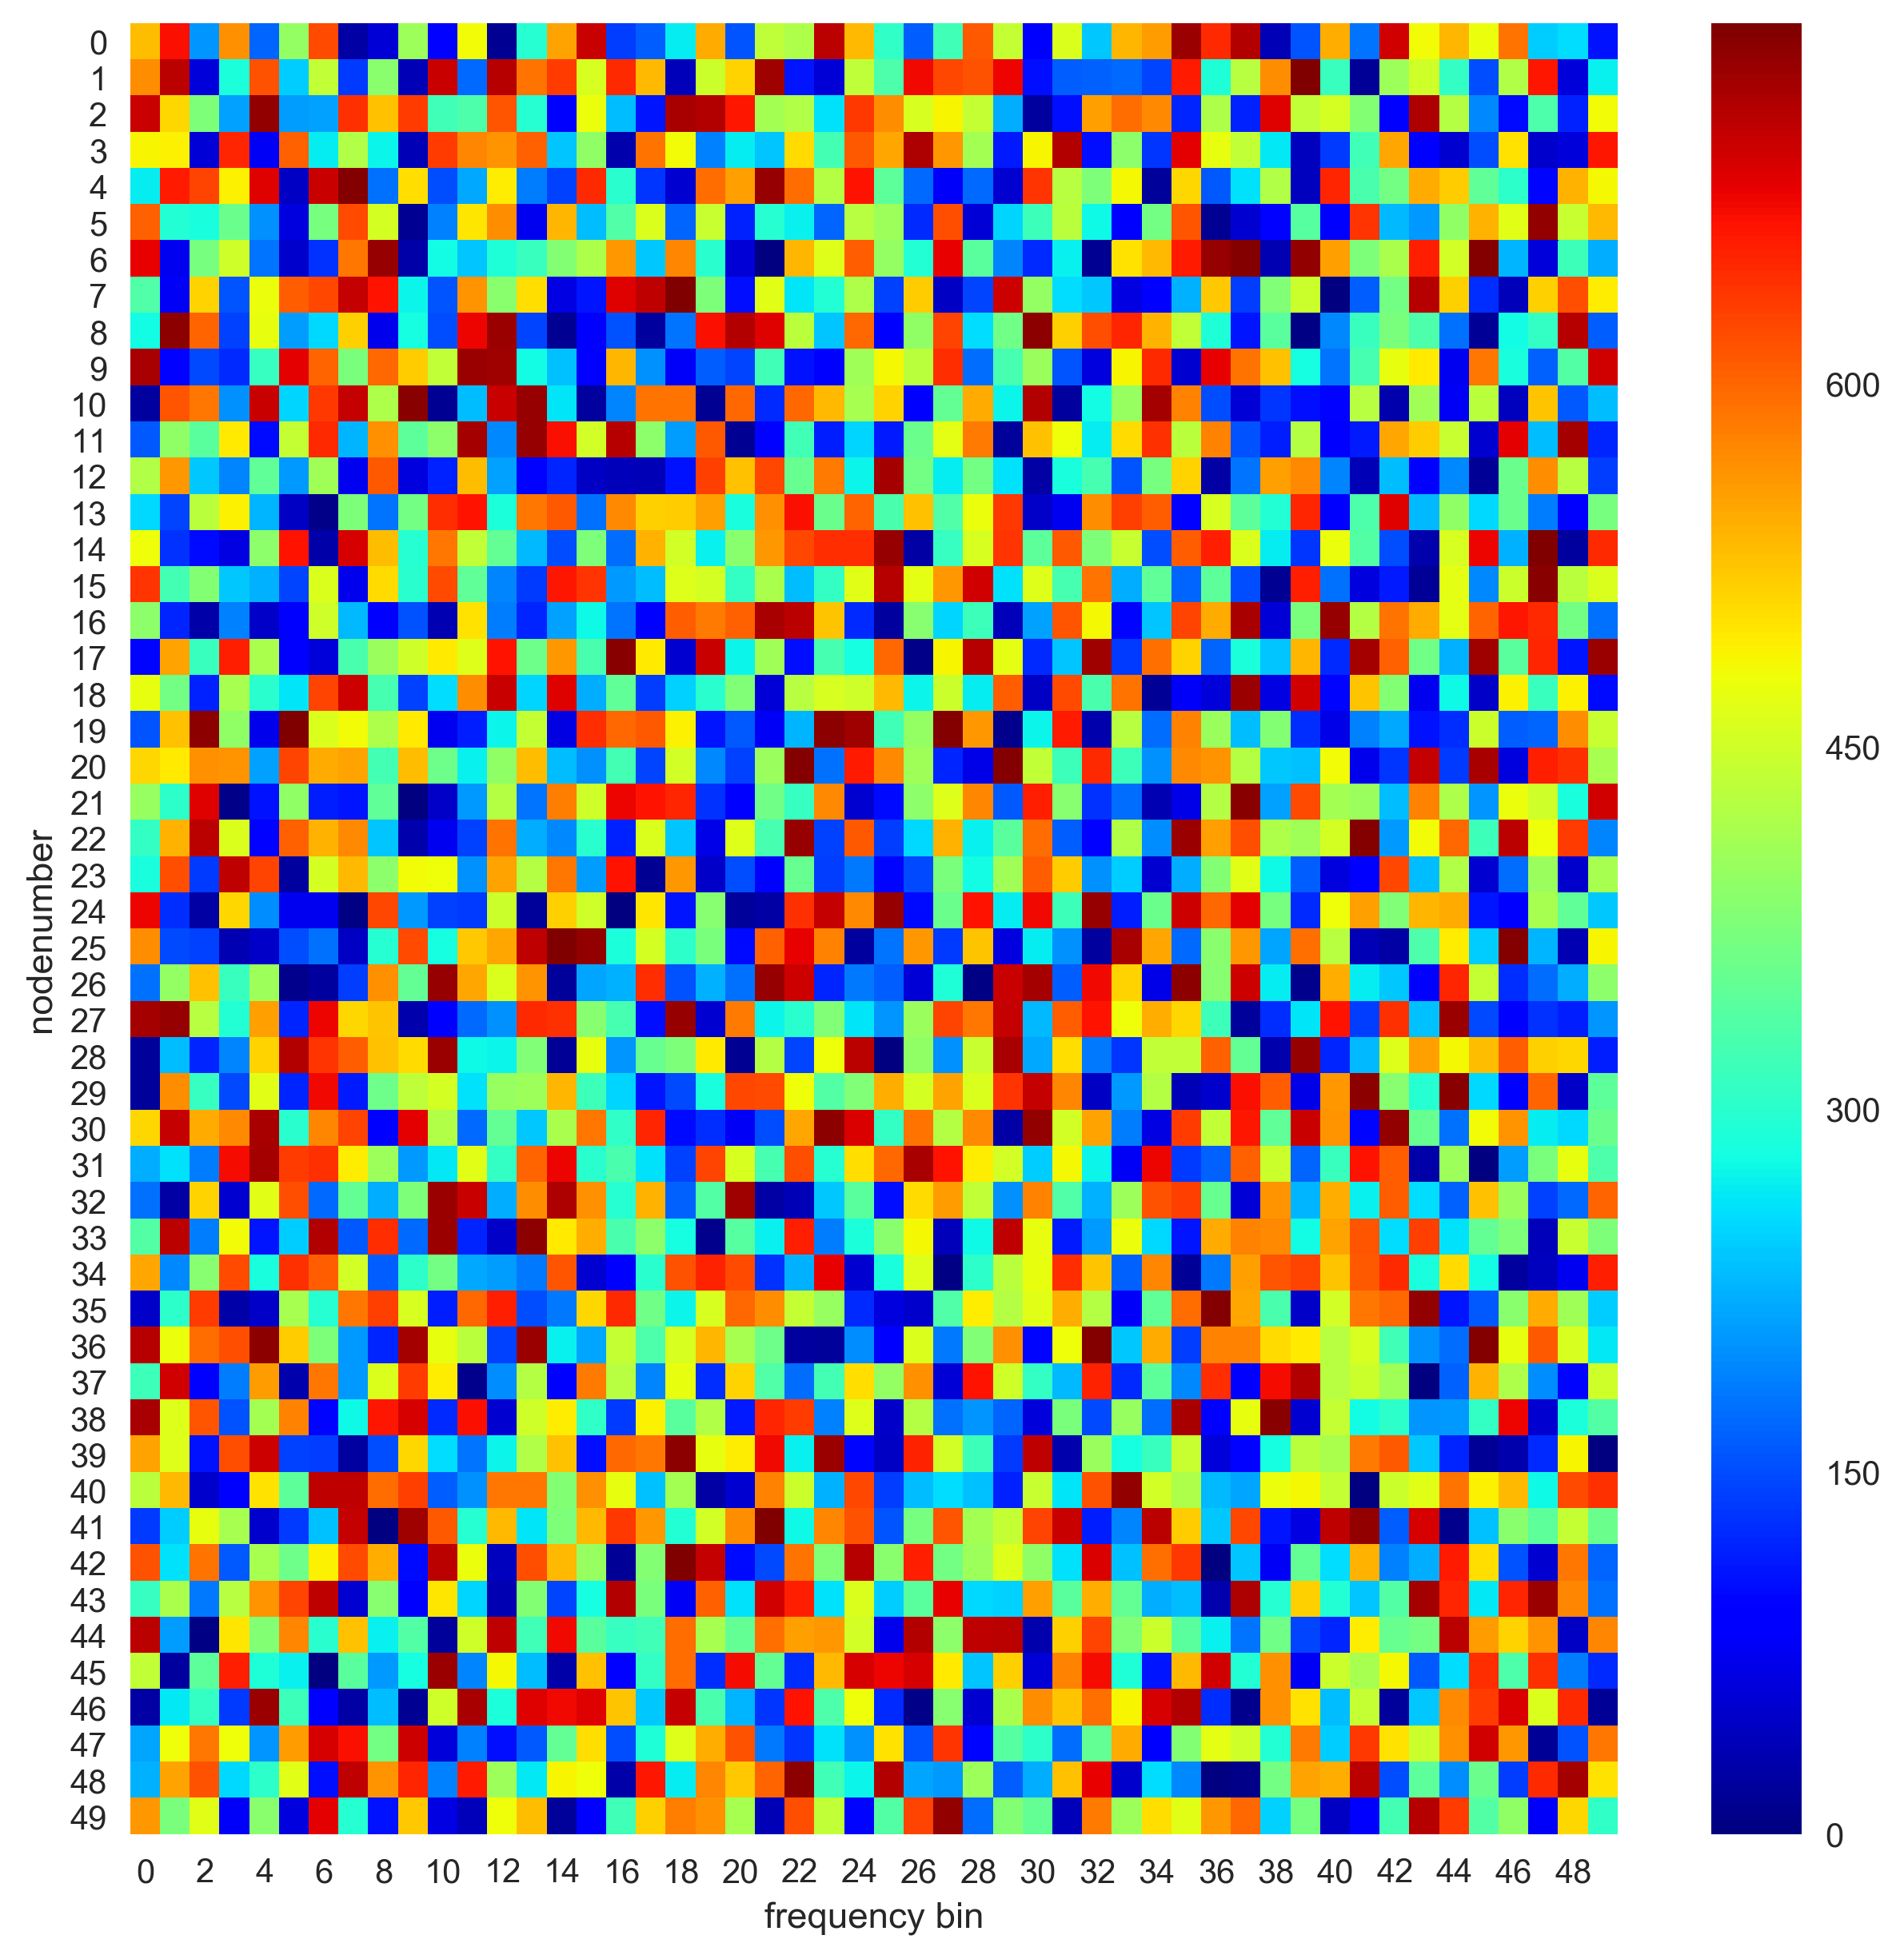

In [58]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(10, 10), dpi=300)
sns_plot = sns.heatmap(mag2, annot=False, linewidths=0, ax=ax, cmap=plt.cm.jet)
plt.savefig("fft_heat.png", bbox_inches='tight')

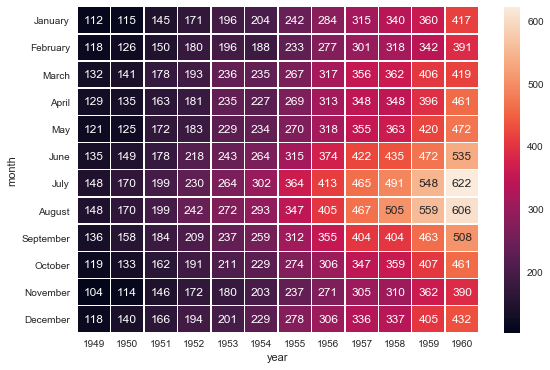

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

In [26]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508
